<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Disproportionality-Bar-Plot" data-toc-modified-id="Disproportionality-Bar-Plot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Disproportionality Bar Plot</a></span></li><li><span><a href="#Parliament-Plot" data-toc-modified-id="Parliament-Plot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parliament Plot</a></span></li></ul></li></ul></div>

**plot**

This notebook provides examples for most functions found in [poli_sci_kit/plot](https://github.com/andrewtavis/poli-sci-kit/tree/main/poli_sci_kit/plot).

The setting is a hypothetical election in Germany for the Bundestag (German national parliament).

This notebook can also be opened in [Google Colab](https://colab.research.google.com/github/andrewtavis/poli-sci-kit/blob/main/examples/plot.ipynb).

In [1]:
# pip install poli-sci-kit

In [2]:
# pip install pltviz

In [3]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import pltviz
import poli_sci_kit
from poli_sci_kit import appointment

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (15, 5)})

from IPython.display import display, HTML

display(HTML("<style>.container { width:99% !important; }</style>"))

# Data

We're using German political parties for this example. The following are their abbreviations and colors:

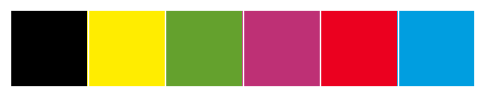

In [4]:
parties = ["CDU/CSU", "FDP", "Greens", "Die Linke", "SPD", "AfD"]
party_colors = ["#000000", "#ffed00", "#64a12d", "#be3075", "#eb001f", "#009ee0"]
sns.palplot(sns.color_palette(party_colors))

Assume that Germany had an election that lead to the following Bundestag allocations:

In [5]:
votes = [2700, 900, 3300, 1300, 2150, 500]

In [6]:
allocations = [26, 9, 37, 12, 23, 5]

# Disproportionality Bar Plot

Graphically depicts the disproportionality between votes received and seats allocated. Bar widths in this case are the proportion of votes received, and heights are the difference or relative difference between votes and seats received.

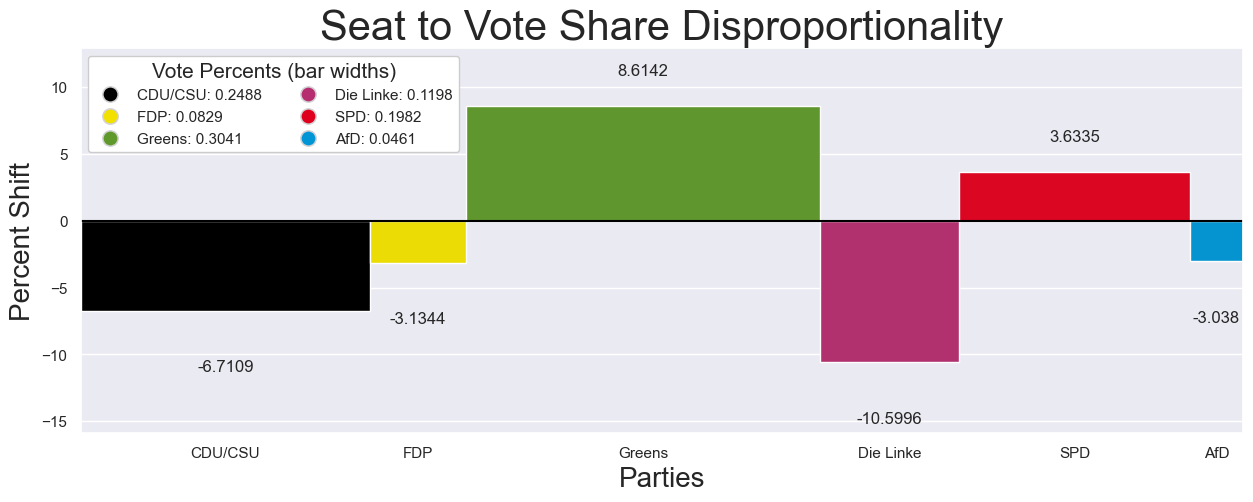

In [7]:
ax = poli_sci_kit.plot.dispr_bar(
    shares=votes,
    allocations=allocations,
    labels=parties,
    colors=party_colors,
    total_shares=None,
    total_alloc=None,
    percent=True,
    axis=None,
)

handles, labels = pltviz.legend.gen_elements(
    counts=[round(v / sum(votes), 4) for v in votes],
    labels=parties,
    colors=party_colors,
    size=11,
    marker="o",
    padding_indexes=None,
    order=None,
)

ax.legend(
    handles=handles,
    labels=labels,
    title="Vote Percents (bar widths)",
    title_fontsize=15,
    fontsize=11,
    ncol=2,
    loc="upper left",
    bbox_to_anchor=(0, 1),
    frameon=True,
    facecolor="#ffffff",
    framealpha=1,
)

ax.axes.set_title("Seat to Vote Share Disproportionality", fontsize=30)
ax.set_xlabel("Parties", fontsize=20)
ax.set_ylabel("Percent Shift", fontsize=20)

plt.savefig("_images/disroportionality_plot.png", bbox_inches="tight")
plt.show()

Let's further show the measure of general disproportionality given the allocations and votes:

In [8]:
appointment.metrics.dispr_index(
    shares=votes, allocations=allocations, metric_type="Gallagher"
)

0.024364384772530633

# Parliament Plot

Leverages a dictionary allocation of matplotlib's scatter plot to color points appropriately.

## Rectangle Plot

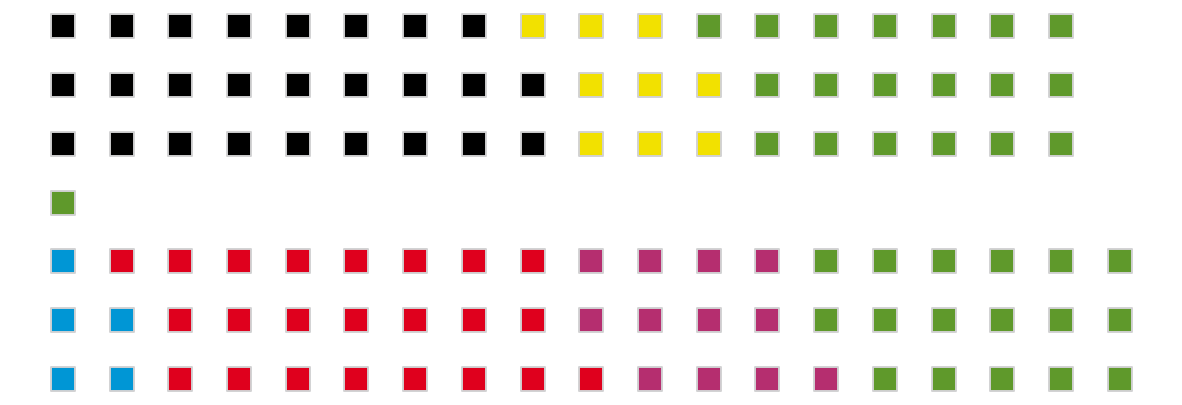

In [9]:
ax = poli_sci_kit.plot.parliament(
    allocations=allocations,
    labels=parties,
    colors=party_colors,
    style="rectangle",
    num_rows=6,
    marker_size=300,
    speaker=True,
    df_seat_lctns=None,
    axis=None,
)

plt.savefig("_images/parliament_plot_rectangle.png", bbox_inches="tight")
plt.show()

## Semicircle Plot

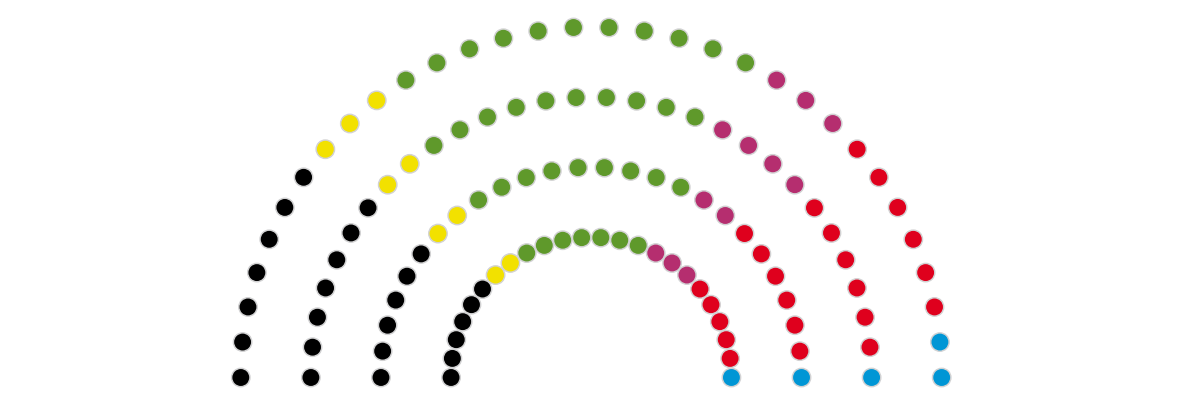

In [16]:
ax = poli_sci_kit.plot.parliament(
    allocations=allocations,
    labels=parties,
    colors=party_colors,
    style="semicircle",
    num_rows=4,
    marker_size=175,
    df_seat_lctns=None,
    axis=None,
)

handles, labels = pltviz.legend.gen_elements(
    counts=allocations,
    labels=parties,
    colors=party_colors,
    size=8,
    marker="o",
    padding_indexes=None,
    order=[2, 1, 0, 3, 4, 5],
)

ax.legend(
    handles=handles,
    labels=labels,
    title="Seats per Party: {} total".format(sum(allocations)),
    title_fontsize=10,
    fontsize=8,
    ncol=2,
    loc="center",
    bbox_to_anchor=(0.5, 0.12),
    frameon=False,
    facecolor="#ffffff",
    framealpha=1,
)

plt.savefig("_images/parliament_plot_semicircle.png", bbox_inches="tight")
plt.show()

## Swap Plot Points

We can also swap points if some are positioned incorrectly.

**Note**: this was added at a time when the parliament plot allocations were not as accurate.

In [11]:
df_seat_lctns = poli_sci_kit.utils.gen_parl_points(
    allocations=allocations,
    labels=parties,
    style="semicircle",
    speaker=False,
    num_rows=4,
)

df_seat_lctns

,group,row,row_position,x_loc,y_loc,theta
0,CDU/CSU,0,0,-2.000000,2.449294e-16,3.141593
24,CDU/CSU,1,0,-3.000000,3.673940e-16,3.141593
50,CDU/CSU,2,0,-4.000000,4.898587e-16,3.141593
80,CDU/CSU,3,0,-5.000000,6.123234e-16,3.141593
81,CDU/CSU,3,1,-4.974347,5.058416e-01,3.040251
...,...,...,...,...,...,...
110,AfD,3,30,4.974347,5.058416e-01,0.101342
23,AfD,0,23,2.000000,0.000000e+00,0.000000
49,AfD,1,25,3.000000,0.000000e+00,0.000000
79,AfD,2,29,4.000000,0.000000e+00,0.000000


In [12]:
# Swap two SPD and AfD allocations.
poli_sci_kit.utils.swap_parl_allocations(
    df=df_seat_lctns, row_0=0, pos_0=23, row_1=2, pos_1=28
)
poli_sci_kit.utils.swap_parl_allocations(
    df=df_seat_lctns, row_0=1, pos_0=25, row_1=3, pos_1=29
)

Now pass df_seat_lctns:

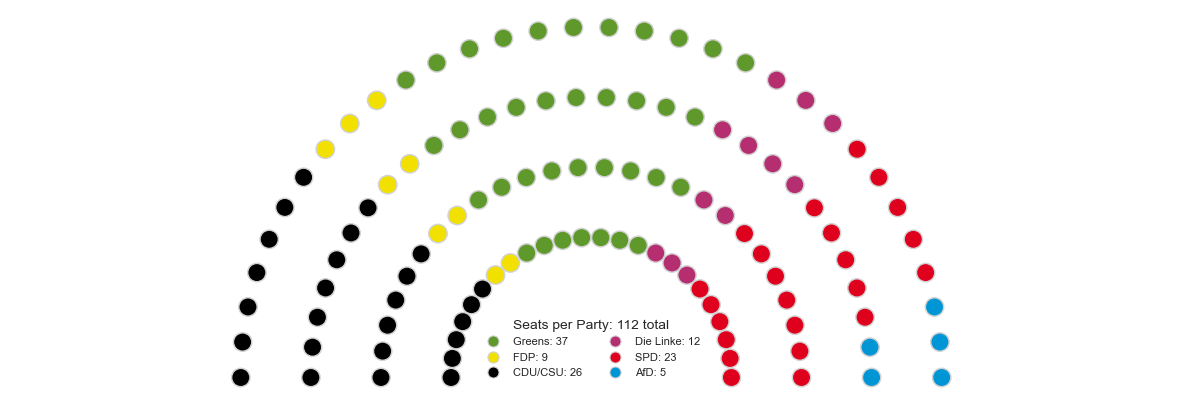

In [13]:
ax = poli_sci_kit.plot.parliament(
    allocations=allocations,
    labels=parties,
    colors=party_colors,
    style="semicircle",
    num_rows=4,
    marker_size=175,
    df_seat_lctns=df_seat_lctns,
    axis=None,
)

handles, labels = pltviz.legend.gen_elements(
    counts=allocations,
    labels=parties,
    colors=party_colors,
    size=8,
    marker="o",
    padding_indexes=None,
    order=[2, 1, 0, 3, 4, 5],
)

ax.legend(
    handles=handles,
    labels=labels,
    title="Seats per Party: {} total".format(sum(allocations)),
    title_fontsize=10,
    fontsize=8,
    ncol=2,
    loc="center",
    bbox_to_anchor=(0.5, 0.12),
    frameon=False,
    facecolor="#ffffff",
    framealpha=1,
)

plt.show()